LTC 1 Time to forget: 1.13s
LTC 2 Time to forget: 0.01s
LTC 3 Time to forget: 0.01s


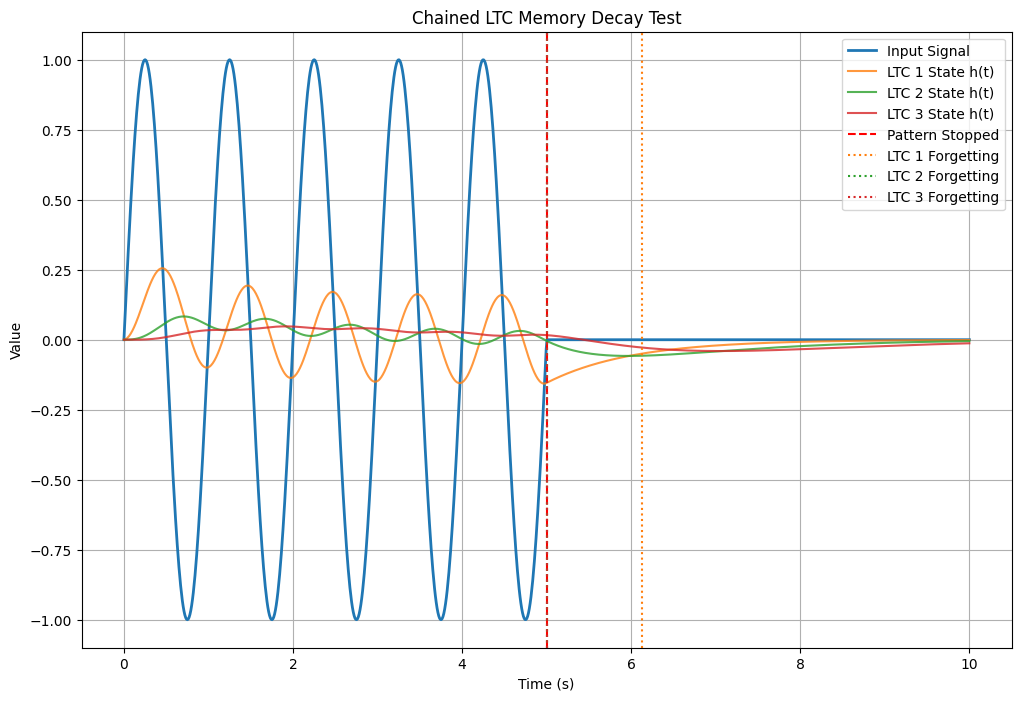

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_ltc = 3        # Number of LTC neurons in chain
tau = 1.0          # Time constant of LTC
dt = 0.01          # Time step
total_time = 10.0  # Total simulation time
pattern_time = 5.0 # Duration of feeding the pattern
threshold = 0.05   # Threshold to determine "forgetting"

num_steps = int(total_time / dt)
pattern_steps = int(pattern_time / dt)

# Create time array and input signal
t = np.linspace(0, total_time, num_steps)
freq = 1.0
input_signal = np.zeros(num_steps)
for i in range(pattern_steps):
    input_signal[i] = np.sin(2 * np.pi * freq * t[i])

# Simulating chain of LTC neurons
h_vals = np.zeros((num_ltc, num_steps))  # Store states for each neuron
h = np.zeros(num_ltc)  # Current state of each neuron

for i in range(num_steps):
    # First neuron gets input signal
    u = input_signal[i]
    dh0 = (1.0 / tau) * (u - h[0])
    h[0] = h[0] + dt * dh0
    
    # Subsequent neurons get input from previous neuron
    for j in range(1, num_ltc):
        dh = (1.0 / tau) * (h[j-1] - h[j])
        h[j] = h[j] + dt * dh
    
    # Store all states
    h_vals[:, i] = h

# Plot Results
plt.figure(figsize=(12,8))
plt.plot(t, input_signal, label='Input Signal', linewidth=2)
for i in range(num_ltc):
    plt.plot(t, h_vals[i], label=f'LTC {i+1} State h(t)', alpha=0.8)
plt.axvline(pattern_time, color='r', linestyle='--', label='Pattern Stopped')

# Find forgetting times for each neuron
for i in range(num_ltc):
    forget_time = None
    for idx in range(pattern_steps, num_steps):
        if abs(h_vals[i, idx]) < threshold:
            forget_time = t[idx] - pattern_time
            plt.axvline(pattern_time + forget_time, color=f'C{i+1}', 
                       linestyle=':', label=f'LTC {i+1} Forgetting')
            break
    print(f"LTC {i+1} Time to forget: {forget_time:.2f}s")

plt.title("Chained LTC Memory Decay Test")
plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()